*Seismogram's from Shihao's input file*

In [81]:
#reading files

from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

import obspy
from obspy import read
factor = 1666
#Rotational components of 1st station in x, y and z direction
st1_curlx = read('/home/ashah/Desktop/Apr16_3/sta01.curlx')
st1_curly = read('/home/ashah/Desktop/Apr16_3/sta01.curly')
st1_curlz = read('/home/ashah/Desktop/Apr16_3/sta01.curlz')

#Translation components of displacement in x, y and z direction
st1_x = read('/home/ashah/Desktop/Apr16_3/sta01.x')
st1_y = read('/home/ashah/Desktop/Apr16_3/sta01.y')
st1_z = read('/home/ashah/Desktop/Apr16_3/sta01.z')

#Translation components of acceleration in x, y and z direction
st1_xv = read('/home/ashah/Desktop/Apr16_3/sta01.xv')
st1_yv = read('/home/ashah/Desktop/Apr16_3/sta01.yv')
st1_zv = read('/home/ashah/Desktop/Apr16_3/sta01.zv')



st1_curlx[0].data = st1_curlx[0].data * 1666.6667
st1_curly[0].data = st1_curly[0].data * -7500

st1_curlz[0].data = st1_curlz[0].data * -10e+5

Epicentral distance [m]:  1000078.0843194758
Theoretical azimuth [deg]:  0.0
Theoretical backazimuth [deg]:  180.0


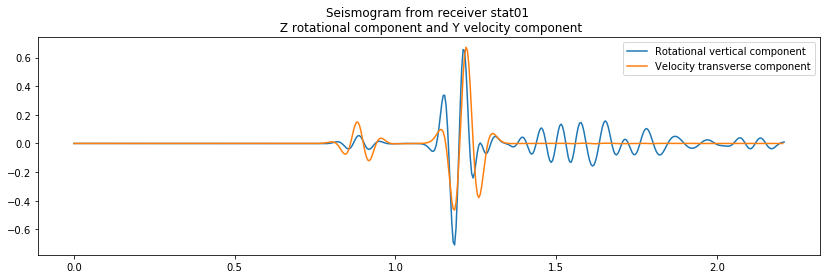

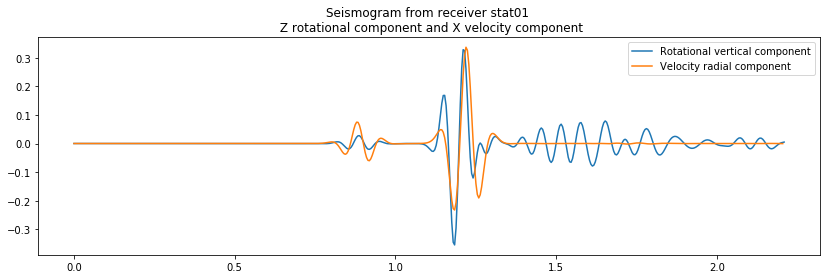

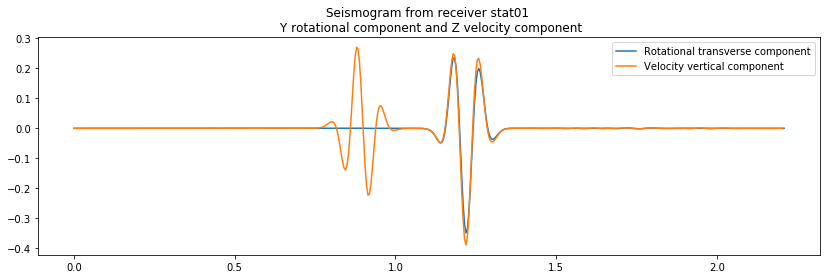

In [82]:
#transforming coordinates

from obspy.geodetics import gps2dist_azimuth
import obspy.signal.util as su

# Source position in geographic coordinate
lat_s = 0
long_s = 0

# Define the receiver position in Cartesian coordinate and convert it
#to geographic coordinate
dist_x = 500 # in km, the distance between receiver and source in x
#direction
dist_y = 1000 # in km, the distance between receiver and source in y
#direction
long_r, lat_r = su.util_lon_lat(long_s,lat_s, dist_x, dist_y)

# Backazimuth
baz = gps2dist_azimuth(lat_s, long_s, lat_r, lat_s)
print('Epicentral distance [m]: ', baz[0])
print('Theoretical azimuth [deg]: ', baz[1])
print('Theoretical backazimuth [deg]: ', baz[2])

# Rotate from ENZ to RTZ components
st1_xv_copy1 = st1_xv.copy()
st1_yv_copy1 = st1_yv.copy()
st1_zv_copy1 = st1_zv.copy()
st1_radial     = st1_xv_copy1.rotate(method='NE->RT',back_azimuth=baz[2])
st1_transverse = st1_yv_copy1.rotate(method='NE->RT',back_azimuth=baz[2])
st1_vertical   = st1_zv_copy1.rotate(method='NE->RT',back_azimuth=baz[2])


fig = plt.figure(figsize=(14,4))
st1_curlz[0].data = st1_curlz[0].data * 2.666666667
plt.plot(st1_curlz[0].times(), st1_curlz[0].data, label='Rotational vertical component')
plt.plot(st1_transverse[0].times(), st1_transverse[0].data, label='Velocity transverse component')
plt.title('Seismogram from receiver stat01 \n Z rotational component and Y velocity component')
plt.legend()

fig = plt.figure(figsize=(14,4))
st1_curlz[0].data = st1_curlz[0].data * 0.5
plt.plot(st1_curlz[0].times(), st1_curlz[0].data, label='Rotational vertical component')
plt.plot(st1_radial[0].times(), st1_radial[0].data, label='Velocity radial component')
plt.title('Seismogram from receiver stat01 \n Z rotational component and X velocity component')
plt.legend()

fig = plt.figure(figsize=(14,4))
st1_curly[0].data = st1_curly[0].data * -0.4
plt.plot(st1_curly[0].times(), st1_curly[0].data, label='Rotational transverse component')
plt.plot(st1_vertical[0].times(), st1_vertical[0].data, label='Velocity vertical component')
plt.title('Seismogram from receiver stat01 \n Y rotational component and Z velocity component')
plt.legend()






In [83]:
import pySW4 as sw4

sw4.plotting.create_seismogram_plots(input_file='/home/ashah/Desktop/Apr19_3.in')
input_, output_ = sw4.read_metadata('/home/ashah/Desktop/Apr19_3.in','/home/ashah/Desktop/Apr16_3/sta01.curlx')


NameError: name 'parse_input_file' is not defined